Bu projede örnek olarak kullanacağımız veriseti yapay öğrenme alanının en popüler verisetlerinden "ıris" veri seti. ıris veri seti 3 ıris bitki türüne(ıris setosa,ıris virgnica ve ıris versicolor) ait, her bir türden 50 örnek olmak üzere toplam 150 önek sayısına sahip bir veri setidir her bir örnek için 4 özellik tanımlanmıştır; taç yaprak uzunluğu,taç yaprak genişliği,çanak yaprak genişliği,çanak yaprak uzunluğu(sepal length,sepal width,petal length,petal width).

Veri setimizde her bir bitki örneği ayrı bir gözlemi ifade ederken; bitki tür ismi bağımlı(dependent) değişken,bitkilerin ölçülen 4 temel özelliği ise bağımsız(independent) değişkenleri ifade eder

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv("pca_iris.data",names=["sepal length","sepal width","petal length","petal width","target"])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#featurları x, targetı y olarak ayıralım
features=["sepal length","sepal width","petal length","petal width"]
x=df[features]

y=df[["target"]]

#### Değerleri scale etmemiz gerekir. çünkü her bir features çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor. bu amaçla standard scaler kullanalrak tüm verileri mean= 0 ve variance =1 olacak şekilde değiştiriyoruz

In [5]:
#standardizing the features
x=StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### PCA Projection 4 boyuttan - 2 boyuta

Orijinal verilerimiz 4 boyuta sahip:sepal length,sepal width,petal length,petal width

Biz PCA yaparak bunları 2 boyuta indirgeyeceğiz ancak PCA indirgeme işlemi sonucunda edeceğimiz 2 boyutun herhangi bir anlam ifade etmeye başlıkları olacak. Yani 4 feature'dan 2 tanesini basit bir şekilde atmış olmayacağız 

In [7]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=["principal component 1","principal component 2"])

In [8]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


* 600 cell'den 300 cell'e indirdik yani %50'lik bir sıkıştırma yaptık.
* şuna dikkat edilmeli ki; burdaki pc1 ve pc2 sütunları bir anlam ifade etmiyor,tamamen 2 tane yeni boyut oluşturuyor.sadece matematiksel olarak bir anlam ifade ediyor

In [9]:
#target sütunumuzu PCA df'imizin sonuna ekleyelim
final_df=pd.concat([principalDf,df[["target"]]],axis=1)
final_df.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


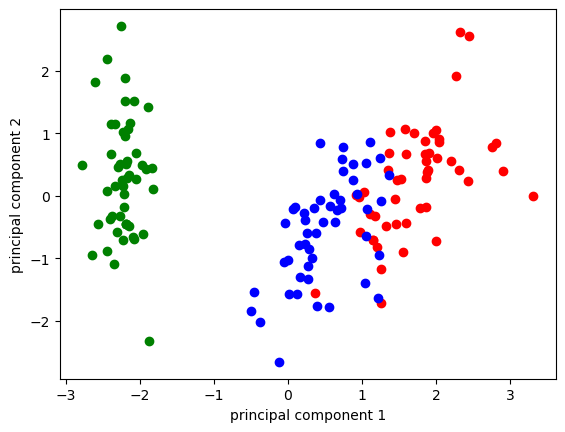

In [11]:
#final_df mizi görselleştirelim
dfsetosa=final_df[df.target=="Iris-setosa"]
dfvirginica=final_df[df.target=="Iris-virginica"]
dfversicolor=final_df[df.target=="Iris-versicolor"]

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

plt.scatter(dfsetosa["principal component 1"],dfsetosa["principal component 2"],color="green")
plt.scatter(dfvirginica["principal component 1"],dfvirginica["principal component 2"],color="red")
plt.scatter(dfversicolor["principal component 1"],dfversicolor["principal component 2"],color="blue")

### Daha profosyonel bir plotting yapalım:

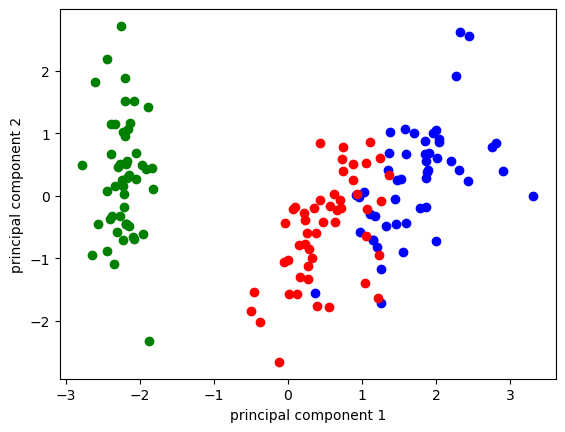

In [12]:
targets=["Iris-setosa","Iris-virginica","Iris-versicolor"]
colors=["g","b","r"]

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

for target,col in zip(targets,colors):
    dftemp=final_df[df.target==target]
    plt.scatter(dftemp["principal component 1"],dftemp["principal component 2"],color=col)

In [14]:
# biz örnek verisetimizin farklılıkların ne kadarını (varyansını) korumuşuz onu bulalım
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [15]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

### Yani verisetimizi %50 küçülttük ve varyans kaybımız sadece %4.2 oldu müthiş bir rakam